<a href="https://colab.research.google.com/github/Gulwalishah/CLT/blob/main/Histopolation_CubicSpilne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

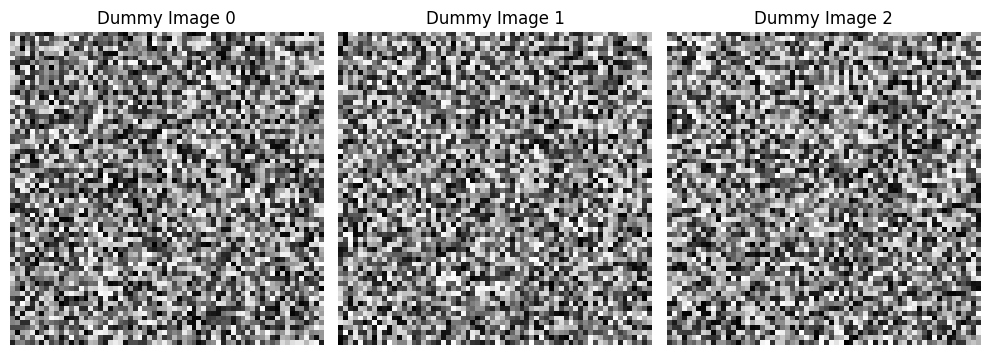

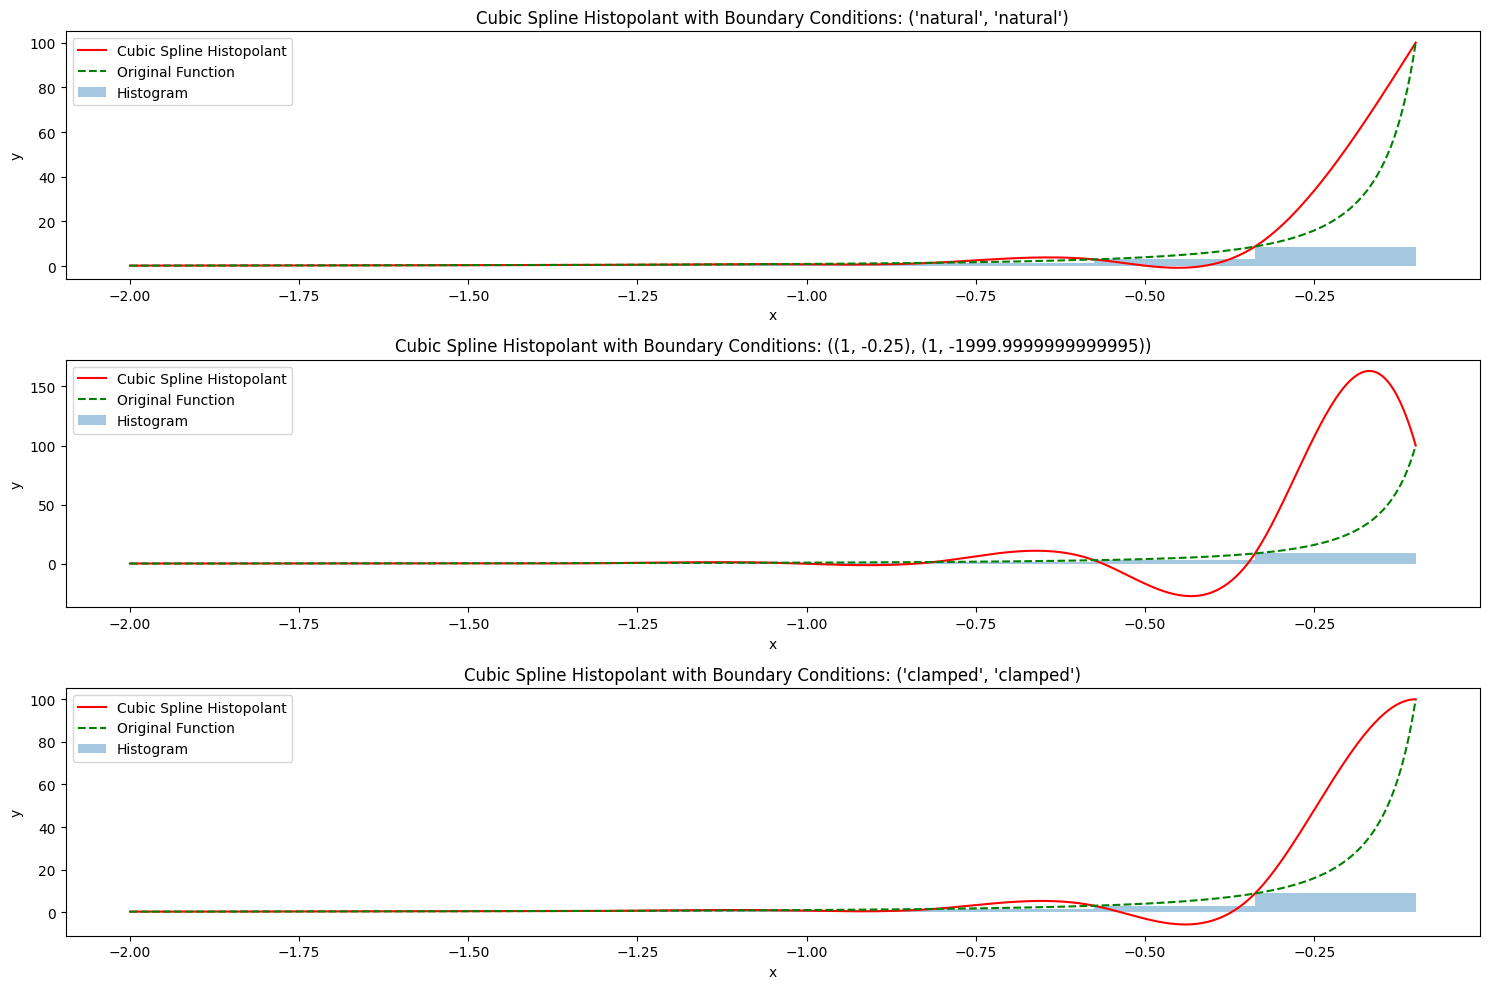

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import os
import cv2

# Function to generate histogram data and histopolate using cubic splines
def cubic_spline_histopolation(x, y, boundary_conditions=None):
    """
    Construct a cubic spline for histopolation based on the given data points.

    Parameters:
    x : array_like
        The x-coordinates of the data points.
    y : array_like
        The y-coordinates of the data points.
    boundary_conditions : tuple or None
        The boundary conditions for the cubic spline ('natural', 'clamped', or tuple for specific derivatives).

    Returns:
    CubicSpline object representing the spline function.
    """
    # Constructing cubic splines based on histogram data
    cs = CubicSpline(x, y, bc_type=boundary_conditions)
    return cs

# Function to generate a dummy dataset of images
def generate_dummy_dataset(output_dir, num_images=10, image_size=(64, 64)):
    """
    Generate a set of random grayscale images and save them to a specified directory.

    Parameters:
    output_dir : str
        Directory where the images will be saved.
    num_images : int
        Number of images to generate.
    image_size : tuple of int
        Size of each generated image (height, width).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i in range(num_images):
        # Create a random grayscale image
        image = np.random.randint(0, 256, image_size, dtype=np.uint8)
        # Save the image
        cv2.imwrite(os.path.join(output_dir, f'dummy_image_{i}.png'), image)

# Generate dummy dataset
dataset_dir = 'dummy_dataset'
generate_dummy_dataset(dataset_dir)

# Load and display some images from the dummy dataset
plt.figure(figsize=(10, 5))
for i in range(3):
    image_path = os.path.join(dataset_dir, f'dummy_image_{i}.png')
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.subplot(1, 3, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Dummy Image {i}')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Define x values (grid points) and y values (function values or heights)
x = np.linspace(-2, -0.1, 9)
y = 1 / x**2

# Different boundary conditions
boundary_conditions_list = [
    ('natural', 'natural'),      # Natural spline: S''(a) = 0, S''(b) = 0
    ((1, 2 / x[0]**3), (1, 2 / x[-1]**3)), # First derivative boundary conditions: S'(a) and S'(b)
    ('clamped', 'clamped')       # Clamped boundaries: S'(a) and S'(b) are specified
]

# Mathematical Explanation
# Cubic splines are piecewise-defined polynomials of degree 3 that are smooth and continuous up to the second derivative.
# In general, a cubic spline S(x) in an interval [x_i, x_{i+1}] can be expressed as:
#
#     S(x) = a_i + b_i * (x - x_i) + c_i * (x - x_i)^2 + d_i * (x - x_i)^3
#
# To construct a cubic spline, we use continuity conditions on S(x), S'(x), and S''(x), along with specified boundary conditions.
# The boundary conditions used here are:
# 1. Natural spline: Second derivatives at the endpoints are zero (S''(a) = 0, S''(b) = 0).
# 2. First derivative conditions: The first derivatives at the endpoints are specified.
# 3. Clamped spline: Both the values and first derivatives are specified at the endpoints.

# Plot all histopolants and cubic spline interpolants
plt.figure(figsize=(15, 10))

for idx, boundary_conditions in enumerate(boundary_conditions_list):
    # Generate cubic spline with specified boundary conditions
    cs = cubic_spline_histopolation(x, y, boundary_conditions)

    # Plot histogram
    plt.subplot(3, 1, idx + 1)
    plt.bar(x[:-1] + np.diff(x)/2, y[:-1], width=np.diff(x), alpha=0.4, label='Histogram')

    # Plot cubic spline interpolant
    x_fine = np.linspace(x[0], x[-1], 500)
    y_fine = cs(x_fine)
    plt.plot(x_fine, y_fine, label='Cubic Spline Histopolant', color='r')

    # Plotting original function for comparison
    plt.plot(x_fine, 1/x_fine**2, label='Original Function', linestyle='--', color='g')

    # Set labels and title
    plt.title(f'Cubic Spline Histopolant with Boundary Conditions: {boundary_conditions}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
